In [1]:
import numpy as np
import os
import cv2
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
%matplotlib inline
os.chdir("/home/mckc/Image Processing/yalefaces")
face_cascade = cv2.CascadeClassifier('/home/mckc/Downloads/opencv-2.4.13/data/haarcascades_GPU/haarcascade_frontalface_default.xml')

In [2]:
def load_data(train):
    from PIL import Image
    print('The input of the train in' ,train.shape)
    X_tr = np.zeros((1,243,320),dtype=np.uint8)
    Y_tr = []
    X_tst = np.zeros((1,243,320),dtype=np.uint8)
    Y_tst = []
    for i in train.values[0:,0]:
        if ('happy' in i) or ('sad' in i) :
            #print(np.array(Image.open(i)).shape,X_tst.shape)
            X_tst = np.vstack((X_tst,np.array(Image.open(i)).reshape(1,243,320)))
            Y_tst = np.append(Y_tst,i[7:8])
        else:
            #print(np.array(Image.open(i)).shape,X_tr.shape)
            X_tr = np.vstack((X_tr,np.array(Image.open(i)).reshape(1,243,320))) 
            Y_tr = np.append(Y_tr,i[7:8])
    print('The input of the train in', X_tr.shape, 'and target is %d' ,Y_tr.shape)
    print('The input of the test in ',X_tst.shape, ' and target is', Y_tst.shape)
    
    #X_tr = np.transpose(X_tr,axes=(2,0,1))
    #X_tst = np.transpose(X_tst,axes=(2,0,1))
    X_tr = X_tr[1:,:,:]
    X_tst = X_tst[1:,:,:]
    print('The input of the train in', X_tr.shape, 'and target is %d' ,Y_tr.shape)
    print('The input of the test in ',X_tst.shape ,' and target is' ,Y_tst.shape)
    return X_tr,X_tst,Y_tr,Y_tst

In [3]:
def simulate(X,Y):
    import scipy as sp
    from scipy import misc
    complete = np.zeros((1,243,320),dtype=np.uint8)
    Y_complete = []
    for i in range(len(X)):
        complete = np.vstack((complete,X[i,:,:].reshape(1,243,320)))
        complete = np.vstack((complete,sp.misc.imrotate(X[i,:,:], angle = 5).reshape(1,243,320)))
        complete = np.vstack((complete,sp.misc.imrotate(X[i,:,:], angle = 10).reshape(1,243,320)))
        complete = np.vstack((complete,sp.misc.imrotate(X[i,:,:], angle = 15).reshape(1,243,320)))
        complete = np.vstack((complete,sp.misc.imrotate(X[i,:,:], angle = -5).reshape(1,243,320)))
        complete = np.vstack((complete,sp.misc.imrotate(X[i,:,:], angle = -15).reshape(1,243,320)))
        complete = np.vstack((complete,sp.misc.imrotate(X[i,:,:], angle = -10).reshape(1,243,320)))
        rotated = np.fliplr(X[i,:,:])
        complete = np.vstack((complete,sp.misc.imrotate(rotated, angle = 5).reshape(1,243,320)))
        complete = np.vstack((complete,sp.misc.imrotate(rotated, angle = 10).reshape(1,243,320)))
        complete = np.vstack((complete,sp.misc.imrotate(rotated, angle = 15).reshape(1,243,320)))
        complete = np.vstack((complete,sp.misc.imrotate(rotated, angle = -5).reshape(1,243,320)))
        complete = np.vstack((complete,sp.misc.imrotate(rotated, angle = -15).reshape(1,243,320)))
        complete = np.vstack((complete,sp.misc.imrotate(rotated, angle = -10).reshape(1,243,320)))
        complete = np.vstack((complete,rotated.reshape(1,243,320)))
        Y_complete = np.append(Y_complete,([Y[i]]*14))
    complete = complete[1:,:,:]
    return complete,Y_complete

In [4]:
def extract_faces(X_tr,Y_tr):
    from skimage.transform import resize
    import time
    start_time = time.clock()
    all_faces = np.zeros((1,96,96),dtype=np.uint8)
    missing = []
    multiple = []
    Y= []
    for i in range(len(X_tr)):
        faces  = face_cascade.detectMultiScale(X_tr[i,:,:],scaleFactor=1.1,minNeighbors=5,minSize=(30, 30))
        n_faces = len(faces)
        if n_faces is 1:
            for (x,y,w,h) in faces:
                fac = np.array(X_tr[i,:,:])[y:(y+h),x:(x+h)]
                out = (resize(fac,(96,96))).reshape((1,96,96))
                all_faces = np.vstack((all_faces,out))
                Y = np.append(Y,Y_tr[i])
        else:
            if n_faces > 1:
                print ('There are multiple faces for index %d and with length %d' % (i , n_faces))
                missing = np.append(missing,i)
                #all_faces = np.vstack((all_faces,np.zeros((1,96,96),dtype=np.uint8)))
            else:
                print ('The face is missing for index %d' %i)
                multiple = np.append(multiple,i)

    all_faces = all_faces[1:,:,:]
    print all_faces.shape
    print time.clock() - start_time, "seconds"
    return all_faces,missing,multiple,Y

In [9]:
import pandas as pd
train = pd.read_csv('/home/mckc/Image Processing/yalefaces/train.csv')
X_tr,X_tst,Y_tr,Y_tst = load_data(train)

('The input of the train in', (166, 2))
('The input of the train in', (137, 243, 320), 'and target is %d', (136,))
('The input of the test in ', (31, 243, 320), ' and target is', (30,))
('The input of the train in', (136, 243, 320), 'and target is %d', (136,))
('The input of the test in ', (30, 243, 320), ' and target is', (30,))


In [10]:
import time
start_time = time.clock()
X_train,Y_train = simulate(X_tr,Y_tr)
print X_train.shape,Y_train.shape
print time.clock() - start_time, "seconds"

(1904, 243, 320) (1904,)
23.039562 seconds


In [11]:
X,missing,multiple,Y = extract_faces(X_train[:,:,:],Y_train)
X_test,missing_test,multiple_test,Y_test = extract_faces(X_tst,Y_tst)

The face is missing for index 177
The face is missing for index 339
The face is missing for index 341
The face is missing for index 345
The face is missing for index 347
The face is missing for index 397
The face is missing for index 401
The face is missing for index 423
The face is missing for index 425
The face is missing for index 429
The face is missing for index 431
The face is missing for index 471
The face is missing for index 557
The face is missing for index 591
The face is missing for index 593
The face is missing for index 597
The face is missing for index 717
The face is missing for index 725
There are multiple faces for index 734 and with length 2
There are multiple faces for index 748 and with length 2
The face is missing for index 809
The face is missing for index 927
The face is missing for index 935
There are multiple faces for index 974 and with length 2
The face is missing for index 1285
The face is missing for index 1299
The face is missing for index 1319
The face i

In [23]:
#Normalising
X = X -0.5
X_test = X_test - 0.5

print X.mean(),X_test.mean()

-0.0975078792702 -0.0834656999999


In [12]:
X_tr.dtype

dtype('uint8')

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

scores = list()
scores_std = list()
n_trees = [10, 25, 50, 100, 250]

for n_tree in n_trees:
        print(n_tree)
        recognizer = RandomForestClassifier(n_tree,verbose=0,oob_score=True,n_jobs=5)
        score = cross_val_score(recognizer, (X.reshape(-1,9216).astype(np.uint8)), Y)
        scores.append(np.mean(score))
        scores_std.append(np.std(score))

10


C:\Users\Omar Saleem Mohammed\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\ensemble\forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


25
50
100
250


('Score: ', array([ 0.48219103,  0.44655124,  0.47298583,  0.45519434,  0.45140036]))
('Std  : ', array([ 0.01421329,  0.03113971,  0.04221252,  0.03717804,  0.03799646]))


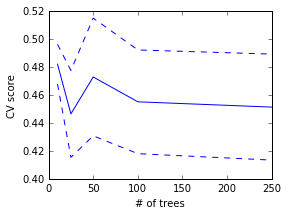

In [9]:
    sc_array = np.array(scores)
    std_array = np.array(scores_std)
    print('Score: ', sc_array)
    print('Std  : ', std_array)

    plt.figure(figsize=(4,3))
    plt.plot(n_trees, scores)
    plt.plot(n_trees, sc_array + std_array, 'b--')
    plt.plot(n_trees, sc_array - std_array, 'b--')
    plt.ylabel('CV score')
    plt.xlabel('# of trees')
    plt.savefig('cv_trees.png')
    #plt.show()

In [50]:
import lasagne
from lasagne import layers
from lasagne.updates import nesterov_momentum,adam,sgd,adadelta
from nolearn.lasagne import NeuralNet
from nolearn.lasagne import visualize

net1 = NeuralNet(
        layers=[('input', layers.InputLayer),
                ('hidden', layers.DenseLayer),
                ('output', layers.DenseLayer),
                ],
        # layer parameters:
        input_shape=(None,1,96,96),
        hidden_num_units=200, # number of units in 'hidden' layer
        hidden_nonlinearity = lasagne.nonlinearities.,
        output_nonlinearity=lasagne.nonlinearities.softmax,
        output_num_units=15,  # 15 target values for the 15 subjects

        # optimization method:
        update=adam,
        update_learning_rate=0.1,
        #update_momentum=0.9,
        

        max_epochs=1500,
        verbose=1,
        )

net1.fit((X.reshape(-1,1,96,96).astype(np.uint8)), Y.astype(np.uint8))
#net1.fit((X_train.reshape(-1,1,243,320).astype(np.uint8)), Y_train.astype(np.uint8))

# Neural Network with 1846415 learnable parameters

## Layer information

  #  name    size
---  ------  -------
  0  input   1x96x96
  1  hidden  200
  2  output  15

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  -----
      1     9.86761     0.78258   12.60914      0.60916  1.09s
      2     1.60566     1.44890    1.10819      0.60916  1.22s
      3     1.19083     0.90324    1.31839      0.60916  1.11s
      4     0.86612     0.75773    1.14305      0.60916  1.20s
      5     0.77344     0.71898    1.07575      0.60916  1.11s
      6     0.73997     0.70515    1.04938      0.60916  1.15s
      7     0.72709     0.69857    1.04082      0.60916  1.11s
      8     0.72289     0.69453    1.04083      0.60916  1.12s
      9     0.72111     0.69142    1.04294      0.60916  1.23s
     10     0.71927     0.68888    1.04413      0.60916  1.21s
     11     0.71720     0.68681    1.04424      0.60916  1.12s
     12     0.7

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x000000001AE3EBA8>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x000000001AE3EA90>,
     check_input=True, custom_scores=None,
     hidden_nonlinearity=<function rectify at 0x000000001A6EDB38>,
     hidden_num_units=200, input_shape=(None, 1, 96, 96),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('hidden', <class 'lasagne.layers.dense.DenseLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=None, max_epochs=1500, more_params={},
     objective=<function objective at 0x000000001AE3A828>,
     objective_loss_function=<function categorical_crossentropy at 0x000000001AD6DAC8>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog instance at 0x000000007F733488>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.PrintLayerInfo instance at 0x00000000838D

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import backend as K
from keras.optimizers import Adam
from keras.utils import np_utils


Y_Keras = np_utils.to_categorical(Y, 15)
# Create first network with Keras
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
model = Sequential()
model.add(Dense(512, input_dim=9216,activation='relu'))
model.add(Dense(15,activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

import time
model.fit((X.reshape(-1,9216).astype(np.uint8)), Y_Keras, nb_epoch=10, batch_size=50,verbose=1,
         validation_data=(X_test.reshape(-1,9216).astype(np.uint8), np_utils.to_categorical(Y_test, 15)))

Train on 2062 samples, validate on 15 samples
Epoch 1/10
2062/2062 [==============================] - 6s - loss: 1.0105 - acc: 0.6358 - val_loss: 0.7210 - val_acc: 0.8000
Epoch 2/10
2062/2062 [==============================] - 3s - loss: 0.6854 - acc: 0.7396 - val_loss: 0.6561 - val_acc: 0.7333
Epoch 3/10
2062/2062 [==============================] - 3s - loss: 0.5600 - acc: 0.8050 - val_loss: 0.5918 - val_acc: 0.7333
Epoch 4/10
2062/2062 [==============================] - 4s - loss: 0.4899 - acc: 0.8274 - val_loss: 0.7485 - val_acc: 0.6667
Epoch 5/10
2062/2062 [==============================] - 4s - loss: 0.4483 - acc: 0.8448 - val_loss: 0.4979 - val_acc: 0.7333
Epoch 6/10
2062/2062 [==============================] - 3s - loss: 0.3565 - acc: 0.8851 - val_loss: 0.4109 - val_acc: 0.8000
Epoch 7/10
2062/2062 [==============================] - 3s - loss: 0.3055 - acc: 0.8957 - val_loss: 0.4790 - val_acc: 0.8000
Epoch 8/10
2062/2062 [==============================] - 5s - loss: 0.2581 - acc

In [23]:
model = Sequential()
model.add(Dense(512, input_dim=9216))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(15))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

model.fit((X.reshape(-1,9216).astype(np.uint8)), Y_Keras, nb_epoch=10, batch_size=10,verbose=1,
         validation_data=(X_test.reshape(-1,9216).astype(np.uint8), np_utils.to_categorical(Y_test, 15)))

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_8 (Dense)                  (None, 512)           4719104     dense_input_4[0][0]              
____________________________________________________________________________________________________
activation_4 (Activation)        (None, 512)           0           dense_8[0][0]                    
____________________________________________________________________________________________________
dropout_3 (Dropout)              (None, 512)           0           activation_4[0][0]               
____________________________________________________________________________________________________
dense_9 (Dense)                  (None, 512)           262656      dropout_3[0][0]                  
___________________________________________________________________________________________

In [ ]:
def CNN(n_epochs):
    net1 = NeuralNet(
        layers=[
        ('input', layers.InputLayer),
        ('conv1', layers.Conv2DLayer),      #Convolutional layer.  Params defined below
        ('pool1', layers.MaxPool2DLayer),   # Like downsampling, for execution speed
        ('conv2', layers.Conv2DLayer),
        ('hidden3', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],

    input_shape=(None, 1, 96, 96),
    conv1_num_filters=7, 
    conv1_filter_size=(3, 3), 
    conv1_nonlinearity=lasagne.nonlinearities.rectify,
        
    pool1_pool_size=(2, 2),
        
    conv2_num_filters=12, 
    conv2_filter_size=(2, 2),    
    conv2_nonlinearity=lasagne.nonlinearities.rectify,
        
    hidden3_num_units=1000,
    output_num_units=15, 
    output_nonlinearity=lasagne.nonlinearities.softmax,

    update_learning_rate=0.0001,
    update_momentum=0.9,
    

    max_epochs=n_epochs,
    verbose=1,
    )
    return net1

prediction = lasagne.layers.get_output('conv1')

cnn = CNN(1000).fit((X.reshape(-1,1,96,96).astype(np.uint8)), Y.astype(np.uint8)) # train the CNN model for 15 epochs

# Neural Network with 25408433 learnable parameters

## Layer information

  #  name     size
---  -------  --------
  0  input    1x96x96
  1  conv1    7x94x94
  2  pool1    7x47x47
  3  conv2    12x46x46
  4  hidden3  1000
  5  output   15

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  ------
      1     2.70684     2.70195    1.00181      0.60916  44.63s
      2     2.69764     2.68985    1.00289      0.60916  50.07s
      3     2.68376     2.67329    1.00392      0.60916  47.69s
      4     2.66456     2.64920    1.00580      0.60916  42.25s
      5     2.63497     2.60806    1.01032      0.60916  44.36s
      6     2.58138     2.52950    1.02051      0.60916  42.83s
      7     2.47649     2.37018    1.04485      0.60916  49.47s
      8     2.26611     2.05720    1.10155      0.60916  47.87s
      9     1.88085     1.54077    1.22072      0.60916  36.62s
     10     1.36008     1.03546    1.31350      0.60916 

In [27]:
def CNN(n_epochs):
    net1 = NeuralNet(
        layers=[
        ('input', layers.InputLayer),
        ('conv1', layers.Conv2DLayer),      #Convolutional layer.  Params defined below
        ('pool1', layers.MaxPool2DLayer),   # Like downsampling, for execution speed
        ('conv2', layers.Conv2DLayer),
        ('hidden3', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],

    input_shape=(None, 1, 96, 96),
    conv1_num_filters=7, 
    conv1_filter_size=(3, 3), 
    conv1_nonlinearity=lasagne.nonlinearities.rectify,
        
    pool1_pool_size=(2, 2),
        
    conv2_num_filters=12, 
    conv2_filter_size=(2, 2),    
    conv2_nonlinearity=lasagne.nonlinearities.rectify,
        
    hidden3_num_units=1000,
    output_num_units=15, 
    output_nonlinearity=lasagne.nonlinearities.softmax,

    update_learning_rate=0.0001,
    update_momentum=0.9,

    max_epochs=n_epochs,
    verbose=1,
    )
    return net1

cnn = CNN(500).fit((X.reshape(-1,1,96,96).astype(np.uint8)), Y.astype(np.uint8)) # train the CNN model for 15 epochs

# Neural Network with 25408433 learnable parameters

## Layer information

  #  name     size
---  -------  --------
  0  input    1x96x96
  1  conv1    7x94x94
  2  pool1    7x47x47
  3  conv2    12x46x46
  4  hidden3  1000
  5  output   15

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  ------
      1     2.71286     2.68199    1.01151      0.09201  38.10s
      2     2.67701     2.62813    1.01860      0.34867  34.35s
      3     2.62043     2.54286    1.03051      0.56174  36.38s
      4     2.51866     2.37385    1.06100      0.58596  35.82s
      5     2.29321     1.98945    1.15269      0.60775  36.45s
      6     1.80290     1.29479    1.39243      0.60775  37.28s
      7     1.17065     0.84128    1.39150      0.60775  34.07s
      8     0.80062     0.74194    1.07909      0.58354  23.43s
      9     0.82500     0.72519    1.13763      0.52300  32.00s
     10     0.83458     0.70614    1.18189      0.59564 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D


model = Sequential()

model.add(Convolution2D(7, 10, 10,
                        border_mode='valid',
                        input_shape=(1, 96, 96)))
model.add(Activation('relu'))
model.add(Convolution2D(7, 10, 10))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(15))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])
model.fit((X.reshape(-1,1,96,96).astype(np.uint8)), Y_Keras, batch_size=20, nb_epoch=30,
          verbose=1, validation_data=(X_test.reshape(-1,1,96,96).astype(np.uint8), np_utils.to_categorical(Y_test, 15)))
#score = model.evaluate(X_test, Y_test, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 2062 samples, validate on 15 samples
Epoch 1/30
 240/2062 [==>...........................] - ETA: 390s - loss: 1.6402 - acc: 0.5500

Attempt to identify the faces using the eigen vectors from the image


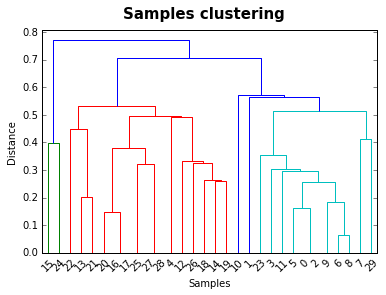

In [9]:
print ('Attempt to identify the faces using the eigen vectors from the image')

from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram 

all_eigens = np.zeros((1,96))
for i in range(len(faces)):
    cov_mat = np.cov(faces[i,:,:])
    eigen_vals,eigen_vecs = np.linalg.eig(cov_mat)
    all_eigens = np.vstack((all_eigens,eigen_vals.reshape(1,96)))
all_eigens = all_eigens[1:,:]

data_dist = pdist(all_eigens[:30,:]) # computing the distance
data_link = linkage(data_dist) # computing the linkage

dendrogram(data_link,labels=all_eigens[:30,:].dtype.names)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.suptitle('Samples clustering', fontweight='bold', fontsize=15);

Attempt to identify the faces using the PCA  from the image


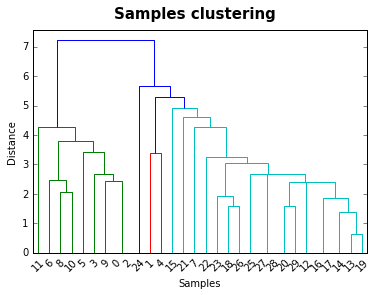

In [10]:
print ('Attempt to identify the faces using the PCA  from the image')

from sklearn.decomposition import PCA
pca = PCA(n_components=95)

pca_values = np.zeros((1,95))
for i in range(len(faces)):
    pca.fit(faces[i,:,:]) 
    pca_values = np.vstack((pca_values,pca.explained_variance_ratio_.reshape(1,95)))
pca_values = pca_values[1:,:]*100

data_dist = pdist(pca_values[:30,:]) # computing the distance
data_link = linkage(data_dist) # computing the linkage

dendrogram(data_link,labels=pca_values[:30,:].dtype.names)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.suptitle('Samples clustering', fontweight='bold', fontsize=15);

Attempt to identify the faces using the SVD  from the image


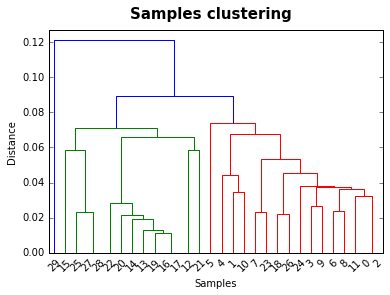

In [11]:
print ('Attempt to identify the faces using the SVD  from the image')

from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=95, random_state=42)
svd_values = np.zeros((1,95))
for i in range(len(faces)):
    svd.fit(faces[i,:,:]) 
    svd_values = np.vstack((svd_values,svd.explained_variance_ratio_.reshape(1,95)))
svd_values = svd_values[1:,:]

data_dist = pdist(svd_values[:30,:]) # computing the distance
data_link = linkage(data_dist) # computing the linkage

dendrogram(data_link,labels=svd_values[:30,:].dtype.names)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.suptitle('Samples clustering', fontweight='bold', fontsize=15);

In [21]:
i = 1
n_faces = 10
print ('There are multiple faces for index  %d and with length %d ' % (i , n_faces))

There are multiple faces for index  1 and with length 10 
